## TA Session 4

### Recap: Cross Validation and Ridge Regression: Example Revisited

Formal description of ridge regression: 

\begin{equation}
\min_{\beta} \sum_{i=1}^n (Y_i - X_i\beta)^2 + \lambda \sum_{j=1}^p \beta_j^2
\end{equation} 


Remember that: 

- We need to standardized covariates: done in the built-in function in glmnet package 
- the tuning parameter is estimated via cross-validation (evaluation of the mean squared error must also accoutn for such a choice)


Standardization of covariates. Why? 

- The penalty depends on the size of the coefficients. Rescaling covariates may affect the scale of the coefficient and so the penalty!

***Comparisons***: 

We aim to compare a linear model and the ridge regression: 

- Linear model: it only includes five variables 
- Ridge regression: it estimates the tuning parameter via cross-validation. 



In [6]:
set.seed(123)

# Generate data
N <- 300
p <- 200

beta <- c(1,1, rep(0, p-2))
X <- matrix(rnorm(p*N), nrow = N, ncol = p)
y <- X%*%beta + rnorm(N)
y <- as.numeric(y)

In [7]:
## Cross validation 
n <- length(y)
## Number of folds 
k <- 10
## Randomly assign units to folds 
ii <- sample(rep(1:k, length= n))

### Description: 

- We have a dataset  which looks as follows: 

$$
X=
  \begin{bmatrix}
    1 &  \textbf{X}_1   \\
    1 & \textbf{X}_2  \\
    : & \textbf{X}_3  \\
    1 &  \textbf{X}_n   \\
  \end{bmatrix}, Y =  
  \begin{bmatrix}
    y_1    \\
    y_2    \\
    : \\
    y_n \\
  \end{bmatrix}
$$

- We assing each row randomly to one out of ten different ''folds'':


$$
X=
  \begin{bmatrix}
    1 &  \textbf{X}_1   \\
    1 & \textbf{X}_2  \\
    : & \textbf{X}_3  \\
    1 &  \textbf{X}_n   \\
  \end{bmatrix}, Y =  
  \begin{bmatrix}
    y_1    \\
    y_2    \\
    : \\
    y_n \\
  \end{bmatrix}, ii =  \begin{bmatrix}
    1    \\
    3    \\
    : \\
    1 \\
     \end{bmatrix}
$$

the vector ii is randomly draw and it looks like 
$$
ii = (1,3,1,3,2,5,10,...,1).
$$

This vector indicates the fold to which each row in our data belongs to. For example: 

- The first, third and last row belong to the first fold
- the second, fourth row belong to the third fold
- and so on... 


In [8]:
## Define accumulators   
pr.1 <- pr.2 <- rep(NA, length(y))

In [9]:
## The vectors are empty and ready to stor our predictions
print(pr.1)

  [1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [26] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [51] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [76] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[101] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[126] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[151] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[176] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[201] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[226] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[251] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[276] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA


In [10]:
### Example with one single fold: 

j = 1 ### We leave out the first fold 

## Define units in the test set (i.e., units in fold j)
hold <- (ii == j)
print(hold)

  [1] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
 [25]  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[121] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

### Description 

- We have defined a vetor which equals true on those units in the first fold: look here

In [11]:
print(cbind(hold, ii)) ## Print hold and the fold to which they belong to

       hold ii
  [1,]    0  8
  [2,]    0 10
  [3,]    0  5
  [4,]    1  1
  [5,]    0  6
  [6,]    0  2
  [7,]    0  8
  [8,]    1  1
  [9,]    0  2
 [10,]    0  3
 [11,]    0 10
 [12,]    0  2
 [13,]    0 10
 [14,]    0 10
 [15,]    1  1
 [16,]    0  5
 [17,]    0 10
 [18,]    0 10
 [19,]    0  9
 [20,]    0  6
 [21,]    0  4
 [22,]    1  1
 [23,]    0  9
 [24,]    0  4
 [25,]    1  1
 [26,]    0  9
 [27,]    1  1
 [28,]    0  8
 [29,]    0  5
 [30,]    0 10
 [31,]    0  7
 [32,]    0  2
 [33,]    0  7
 [34,]    0  2
 [35,]    0  3
 [36,]    0  9
 [37,]    0  4
 [38,]    0  4
 [39,]    0  5
 [40,]    0  3
 [41,]    0  2
 [42,]    0  2
 [43,]    0  5
 [44,]    0  6
 [45,]    0  4
 [46,]    0  9
 [47,]    0  5
 [48,]    0  7
 [49,]    0  4
 [50,]    0  9
 [51,]    0  9
 [52,]    0  9
 [53,]    0  9
 [54,]    1  1
 [55,]    0 10
 [56,]    0  7
 [57,]    1  1
 [58,]    0  2
 [59,]    0 10
 [60,]    0  4
 [61,]    0 10
 [62,]    0  7
 [63,]    0  7
 [64,]    0  7
 [65,]    1  1
 [66,]    

In [12]:
### Define the training set 
train <- (ii != j)
print(cbind(train,ii))

       train ii
  [1,]     1  8
  [2,]     1 10
  [3,]     1  5
  [4,]     0  1
  [5,]     1  6
  [6,]     1  2
  [7,]     1  8
  [8,]     0  1
  [9,]     1  2
 [10,]     1  3
 [11,]     1 10
 [12,]     1  2
 [13,]     1 10
 [14,]     1 10
 [15,]     0  1
 [16,]     1  5
 [17,]     1 10
 [18,]     1 10
 [19,]     1  9
 [20,]     1  6
 [21,]     1  4
 [22,]     0  1
 [23,]     1  9
 [24,]     1  4
 [25,]     0  1
 [26,]     1  9
 [27,]     0  1
 [28,]     1  8
 [29,]     1  5
 [30,]     1 10
 [31,]     1  7
 [32,]     1  2
 [33,]     1  7
 [34,]     1  2
 [35,]     1  3
 [36,]     1  9
 [37,]     1  4
 [38,]     1  4
 [39,]     1  5
 [40,]     1  3
 [41,]     1  2
 [42,]     1  2
 [43,]     1  5
 [44,]     1  6
 [45,]     1  4
 [46,]     1  9
 [47,]     1  5
 [48,]     1  7
 [49,]     1  4
 [50,]     1  9
 [51,]     1  9
 [52,]     1  9
 [53,]     1  9
 [54,]     0  1
 [55,]     1 10
 [56,]     1  7
 [57,]     0  1
 [58,]     1  2
 [59,]     1 10
 [60,]     1  4
 [61,]     1 10
 [62,]  

In [15]:
### Define the training data and the test data 

xx.tr <- X[train,]
y.tr <-  y[train]
xx.te <- X[hold,]

## Run your linear regression on the training data only  and store the coefficients 
coef_reg1 <- lm(y.tr ~ xx.tr[, c(1,2,3)])$coef
## Predict on the units in the first fold (test data )
pr.1[hold] <- cbind(1, xx.te[, c(1,2,3)])%*%coef_reg1

### Description

- We stored in the empty vectors the predictions on the row in the first fold, leaving the other entries of such a vector empty

In [17]:
head(pr.1) ## Example of the first six entries - we filled predictions only on units in the first fold

[1]        NA        NA        NA -1.031801        NA        NA

In [22]:
## Repeat with ridge regression 

### find the best ridge on the TRAINING SET!
library(glmnet)
lambda_seq <- exp(seq(from  = -4, to = 4, length = 50))
rr.cv <- cv.glmnet(x=as.matrix(xx.tr), y=y.tr, lambda=lambda_seq, nfolds=k, alpha=0)
pr.2[hold] <- predict(rr.cv, newx= as.matrix(xx.te))

### What did we do? 

- We defined a sequence of lambdas $\lambda_1 = e^{-4}, \lambda_2 = e^{-3.9}, ..., \lambda_50 = e^4
- We cross validated our ridge regression to find the optimal lambda
- we predict on the hold set using such a model

## Now loop over all the folds!

In [23]:
lambda_seq <- exp(seq(from  = -4, to = 4, length = 50))
for (j in 1:k){
    hold <- (ii == j)
    train <- (ii != j)
    xx.tr <- X[train,]
    y.tr <-  y[train]
    xx.te <- X[hold,]
    coef_reg1 <- lm(y.tr ~ xx.tr[, c(1,2,3)])$coef
    
    ### find the best ridge on the TRAINING SET!
    rr.cv <- cv.glmnet(x=as.matrix(xx.tr), y=y.tr, lambda=lambda_seq, nfolds=k, alpha=0)
    pr.1[hold] <- cbind(1, xx.te[, c(1,2,3)])%*%coef_reg1
    pr.2[hold] <- predict(rr.cv, newx= as.matrix(xx.te))
  }

In [24]:
### Now the vector of predictions are filled with our OUT OF SAMPLE predictions
head(pr.1)

[1] -1.2324536 -0.9391749  0.6269995 -1.0318006 -0.3677221  2.0641016

In [26]:
### Evaluate the MSE 
mspe1 <- mean((pr.1-y)^2)
mspe2 <- mean((pr.2-y)^2)
print(c(mspe1,mspe2))

## What is better?

[1] 1.117073 2.036466


## Remember the Other Selection Criteria as Well

- Adjusted R-Squared
- Mallow's Cp
- AIC
- BIC
- ... 


### Best Subset Selection

- Which variables should we include in our model? 

- Comparison of all models: computational infeasible

- Two heuristic procedures: backward and forward stepwise procedures

**Forward Stepwise**


- Start with the simplest model: only include the intercept
- Add one variable at a time
- Continue iterating until when the score (e.g., R squared, AIC, BIC or cross validation error) does not decrease anymore. 


- Pros? Cons? 


**Example: Credit Data** - Selection using the adjusted R squared

In [59]:
Credit <- read.csv("https://raw.githubusercontent.com/dviviano/ECON178_TA/master/data/Credit.csv")


y <- Credit$Balance 
X <- Credit[, c(2:11)] ## Save your covariates

saved_R_squared <- rep(NA, length(c(1:11)))
## Consider the intercept 

my_model <- lm(y ~ 1) ## Regression which only includes the intercept 
## Compute the Rsqured 
saved_R_squared[1] <- summary(my_model)$adj.r.squared
## Repeat for the second model:
my_model <- lm(y ~ X[,1])
saved_R_squared[2] <- summary(my_model)$adj.r.squared
print(saved_R_squared[c(1,2)])

## Which one do you prefer? 

[1] 0.0000000 0.2130049


### Description

- We have saved the outcome and the covariates of interest 
- We have started from a first model which only includes the intercept
- We computed its R squred (which is always zero ... )
- We then moved to a second model with the first covariate and computed the R squared.

- Can we replicate for all models until which we stop? 


In [60]:
models <- c(2:10)
for (j in models){
    my_model <- lm(y ~., data = X[,1:j]) ## Select the column from 1 to j
    saved_R_squared[j+1] <- summary(my_model)$adj.r.squared
}

 [1] 0.0000000 0.2130049 0.8704576 0.8753014 0.8757469 0.8765148 0.8763864
 [8] 0.8760885 0.9539575 0.9538946 0.9538287


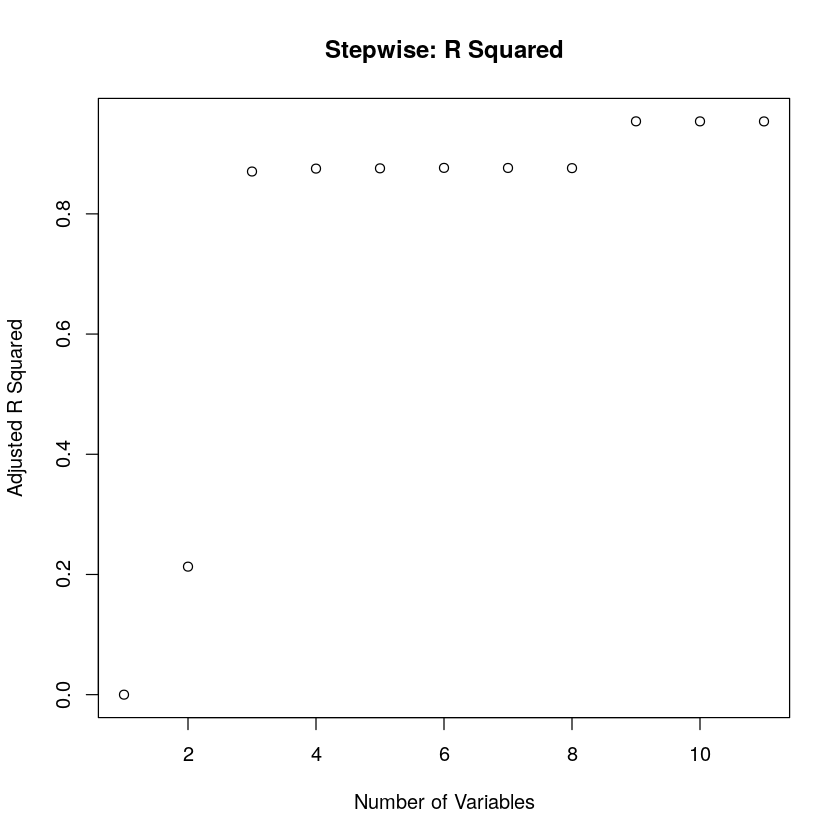

In [61]:
## See how the model behaves
print(saved_R_squared)

## Plot the R squared
num_variables <- c(1:11)
plot(y = saved_R_squared, x  = num_variables, main = 'Stepwise: R Squared', xlab = 'Number of Variables', ylab = 'Adjusted R Squared')

### Question: What would we observe if we had used only the R squared (without adjusting?)



In [62]:
### Can we do it using backward stepwise? 
## At each step we REMOVE one variable

models <- rev(c(2:10))
print(models)


[1] 10  9  8  7  6  5  4  3  2


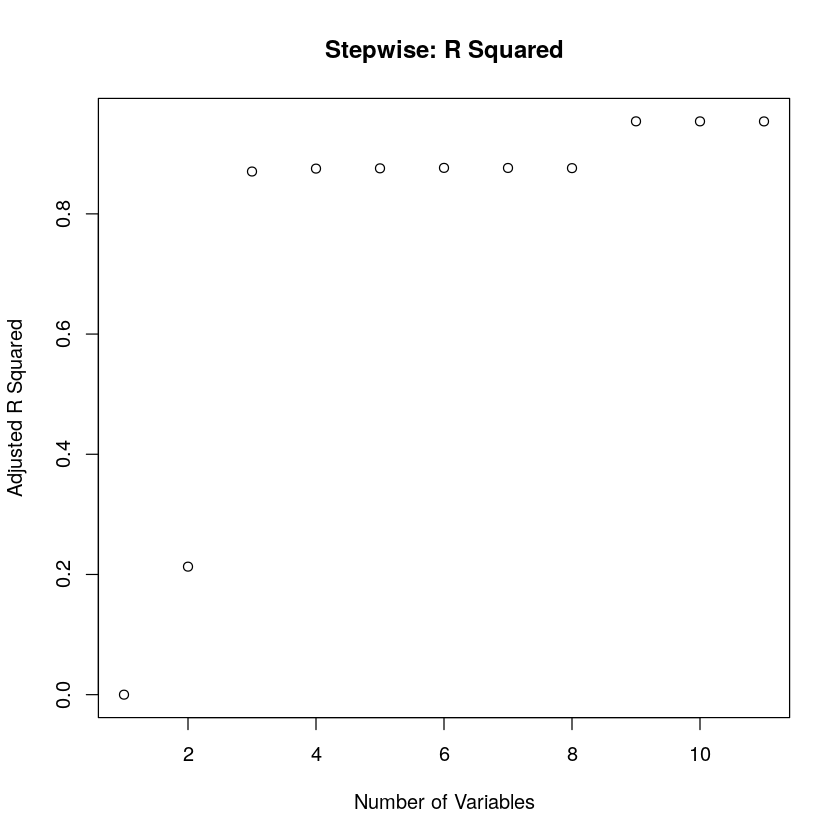

In [63]:
saved_R_squared2 <- rep(NA, 9)
k <- 1
for (j in models){
    my_model <- lm(y ~., data = X[,c(1:j)]) ## Select the column from 1 to j
    saved_R_squared2[k] <- summary(my_model)$adj.r.squared
k <- k + 1
}

## Plot the result 
## Remember to include also the model which only contains the intercept and the first variable 

saved_R_squared2 <- c(saved_R_squared2, saved_R_squared[2], saved_R_squared[1])
plot(y = saved_R_squared2, x  = c(11:1), main = 'Stepwise: R Squared', xlab = 'Number of Variables', ylab = 'Adjusted R Squared')

### Remarks

- In this case the forward and backward stepwise give the same answer (8 variables) 
- This may not be necessarily the case, and you should be careful! 
- Cross validation can help in deciding which of the two methods may be used 


## Cross Validation for StepWise: Example

In [97]:
set.seed(123)

  n <- length(y)
  k <- 10

  ii <- sample(rep(1:k, length= n))
  
  pred <- rep(NA, length(y))
  for (v in 1:k){
    hold <- (ii == v)
    train <- (ii != v)
    xx.tr <- X[train,]
    y.tr <-  y[train]
    xx.te <- X[hold,]
  
  ## Use the stepwise method here 
  saved_R_squared <- rep(NA, length(c(1:11)))
  ## Save the models in a list
  models <- list()
  my_model <- lm(y ~ 1) ## Regression which only includes the intercept 
  models[[1]] <- my_model
  ## Compute the Rsqured 
  saved_R_squared[1] <- summary(my_model)$adj.r.squared
  ## Repeat for the second model:
  my_model <- lm(y ~ X[,1])
  models[[2]] <- my_model
  saved_R_squared[2] <- summary(my_model)$adj.r.squared    
  
  
  for (j in c(2:10)){
    my_model <- lm(y ~., data = X[,1:j]) ## Select the column from 1 to j
    models[[j+1]] <- my_model
    saved_R_squared[j+1] <- summary(my_model)$adj.r.squared
  }
  
  ## Evaluate the best model: 
  best <- which.max(saved_R_squared)
  best_model <- models[[best]] ## Pick in the list the best model
  ## Exctract the coefficients and predict 
  
  if (best > 1) pred[hold] <- predict(best_model, newdata = xx.te[, c(1:(best - 1))]) ## Case where we do not have the intercept
  if (best == 1) pred[hold] <- mean(y.tr) ## Predict with the intercept otherwise                                 
  }

## Note: this can be different if we did not cross-validated twice! 

In [100]:
mean((pred - y)**2)


[1] 9513.399

## Optimizing the choice of the variables

In [ ]:
Credit <- read.csv("https://raw.githubusercontent.com/dviviano/ECON178_TA/master/data/Credit.csv")

y <- Credit$Balance 
X <- Credit[, c(2:11)] ## Save your covariates
constant <- rep(1, 400)

saved_max_R_squared <- rep(0, length(c(1:10)))
saved_R_squared <- rep(0, length(c(1:10)))


for (j in 1:10){
  my_model <- lm(y ~ X[,j])
  saved_R_squared[j] <- summary(my_model)$adj.r.squared
}
saved_max_R_squared[1] <- max(saved_R_squared)
max_var <- which(saved_R_squared==max(saved_R_squared))
saved_R_squared <- rep(0, length(c(1:10)))

#Now we add one variable
XX <- X[,-max_var]
X_chosen <-X[,max_var]

for (j in 1:9){
  my_model <- lm(y ~ X_chosen  + XX[,j])
  saved_R_squared[j] <- summary(my_model)$adj.r.squared
}
saved_max_R_squared[2] <- max(saved_R_squared)
max_var <- which(saved_R_squared==max(saved_R_squared))
saved_R_squared <- rep(0, length(c(1:10)))

#Now we add two variables
X_chosen <-cbind(X_chosen, XX[,max_var])
XX <- XX[,-max_var]

variables <- c(1:8)
for (j in variables){
  my_model <- lm(y ~ X_chosen + XX[,j])
  saved_R_squared[j] <- summary(my_model)$adj.r.squared
}
saved_max_R_squared[3] <- max(saved_R_squared)
max_var <- which(saved_R_squared==max(saved_R_squared))
saved_R_squared <- rep(0, length(c(1:10)))

#Now we add ... variable
X_chosen <-cbind(X_chosen, XX[,max_var])
XX <- XX[,-max_var]

variables <- c(1:7)
for (j in variables){
  my_model <- lm(y ~ X_chosen + XX[,j])
  saved_R_squared[j] <- summary(my_model)$adj.r.squared
}
saved_max_R_squared[4] <- max(saved_R_squared)
max_var <- which(saved_R_squared==max(saved_R_squared))
saved_R_squared <- rep(0, length(c(1:10)))


## Home exercise: Complete the above code

### Optional Exercise

- Write a function in R to perform backward and forward stepwise 
- The function must take as input y and X and return the index of the variables selected by the procedure